<a href="https://colab.research.google.com/github/ANU-2524/MusicRecommendation-ML/blob/main/MusicRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link : https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [1]:
!pip install kaggle -q

In [2]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
kaggle_config = json.load(open("/content/kaggle.json"))

In [4]:
kaggle_config.keys()


dict_keys(['username', 'key'])

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']


In [6]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 994MB/s]


In [7]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [8]:
with zipfile.ZipFile('/content/spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [9]:
df = pd.read_csv("/content/spotify_millsongdata.csv")

In [10]:
df.shape

(57650, 4)

In [11]:
df.head()
# df.tail()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [13]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [14]:
top_artists = df['artist'].value_counts().head(10)
print("Top 10 Artists !")
print(top_artists)

Top 10 Artists !
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [15]:
df = df.sample(10000)
df = df.drop("link" , axis = 1 ).reset_index(drop=True)

In [16]:
df.head()

,artist,song,text
0,Status Quo,Hard Ride,Living a life without you \r\nLiving a life w...
1,Chuck Berry,Drifting Heart,Who set my heart \r\nEver - drifting? \r\nYo...
2,Primus,The Carpenter And The Dainty Bride,"To the carpenter said the dainty bride, \r\nT..."
3,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr..."
4,Neil Diamond,Happy Christmas (War Is Over),And so this is Christmas \r\nAnd what have yo...


In [17]:
all_lyrics = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800 , height=400 , background_color='black').generate(all_lyrics)

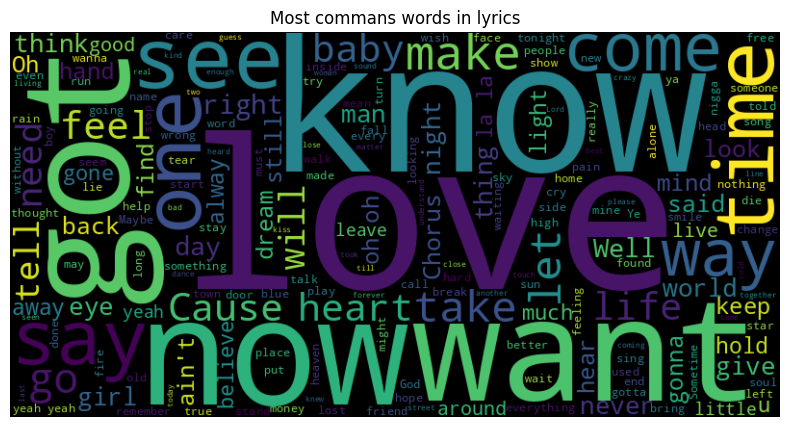

In [18]:
plt.figure(figsize=(10 , 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most commans words in lyrics")
plt.show()

In [19]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop_words = set(stopwords.words('english'))
print(len(stop_words))

198


In [21]:
df.head()

,artist,song,text
0,Status Quo,Hard Ride,Living a life without you \r\nLiving a life w...
1,Chuck Berry,Drifting Heart,Who set my heart \r\nEver - drifting? \r\nYo...
2,Primus,The Carpenter And The Dainty Bride,"To the carpenter said the dainty bride, \r\nT..."
3,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr..."
4,Neil Diamond,Happy Christmas (War Is Over),And so this is Christmas \r\nAnd what have yo...


In [22]:
def preprocess_text(text) :
  text = re.sub(r"[^a-zA-Z\s]", "" , text )
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [23]:
df["cleaned_text"] = df["text"].apply(preprocess_text)
df.head()

,artist,song,text,cleaned_text
0,Status Quo,Hard Ride,Living a life without you \r\nLiving a life w...,living life without living life without im gon...
1,Chuck Berry,Drifting Heart,Who set my heart \r\nEver - drifting? \r\nYo...,set heart ever drifting start never lifting fi...
2,Primus,The Carpenter And The Dainty Bride,"To the carpenter said the dainty bride, \r\nT...",carpenter said dainty bride grass appears gree...
3,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr...",well pigeon name fred done shot head railroad ...
4,Neil Diamond,Happy Christmas (War Is Over),And so this is Christmas \r\nAnd what have yo...,christmas done another year new one begun chri...


In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"])


In [25]:
df.head()

,artist,song,text,cleaned_text
0,Status Quo,Hard Ride,Living a life without you \r\nLiving a life w...,living life without living life without im gon...
1,Chuck Berry,Drifting Heart,Who set my heart \r\nEver - drifting? \r\nYo...,set heart ever drifting start never lifting fi...
2,Primus,The Carpenter And The Dainty Bride,"To the carpenter said the dainty bride, \r\nT...",carpenter said dainty bride grass appears gree...
3,America,Pigeon Song,"Well, I had me a pigeon \r\nBy the name of Fr...",well pigeon name fred done shot head railroad ...
4,Neil Diamond,Happy Christmas (War Is Over),And so this is Christmas \r\nAnd what have yo...,christmas done another year new one begun chri...


In [26]:
cosine_sim = cosine_similarity(tfidf_matrix , tfidf_matrix)

In [27]:
def recommend_songs(song_name , cosine_sim = cosine_sim , df = df , top_n=5) :
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0 :
    return "Song not found in the dataset !"
  idx = idx[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores , key = lambda x : x[1] , reverse=True)
  sim_scores = sim_scores[1:top_n + 1]
  song_indices =  [i[0] for i in sim_scores]
  return df[["artist" , 'song']].iloc[song_indices]


In [28]:
df['song'][2]

'The Carpenter And The Dainty Bride'

In [32]:
print("Recommendations for the songs ...")
recommendations = recommend_songs("Pigeon Song")
print(recommendations)

Recommendations for the songs ...
                 artist                 song
5848     Tragically Hip        Done And Done
9485   Vertical Horizon    The Middle Ground
9586  Twenty One Pilots                Clear
5526               Glee            Last Name
6628       Face To Face  You've Done Nothing
